<a href="https://colab.research.google.com/github/Terry-Migwi/Amazon_Reviews_Sentiment_Analysis/blob/main/Sentiment_Analysis_CDs_%26_Vinyl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Defining the question

### Specifying the data analytic question

This notebook analyses Amazon's CDs and Vinyl product reviews to obtain sentiments from customer's reviews using `VADER Sentiment Analyzer`.

The objectives of this study include:

*   Text cleaning and pre-processing using `NLTK` toolkit.
*   Identify positive, neutral, and negative reviews.
*   Perform exploratory data analysis to find out the most frequently used words in the dataset.

### Context

Sentiment Analysis is the method of identifying and categorizing opinions
expressed in text in order to determine whether a writer’s attitude towards a particular topic is positive, negative, or neutral. This research performs sentiment analysis using two techniques:
The first technique is using a sentiment analyzer, `Valence Aware Dictionary and sEntiment Reasoner.`(VADER). VADER uses a rule based approach to determine the polarity of text data, then it assigns sentiment scores which are used to classify the text into positive, neutral, and negative categories.
Gilbert(2014). The sentiment analyzer is then used to identify the most commonly occurring pairs of words on the reviews.

### Reading the data

In [ ]:
# import libraries

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Use regular expression
import re

# Get a bunch of tools from nltk for nlp

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# First upload a review data set to the runtime

# Initiate an empty list to store sliced dataframes (chunks)
myList = []

# Specify the chunksize
chunksize = 1000

# nrows should be more than the total number of rows in the whole file
for chunk in pd.read_json('/content/drive/MyDrive/Colab Notebooks/CDs_and_Vinyl_5.json.gz', compression='gzip', nrows=10000000, lines=True, chunksize=chunksize):
    myList.append(chunk)

# put the chunks together
myData = pd.concat(myList,axis=0)

### Checking the data

In [ ]:
# preview the top of the data
myData.head()

,reviewerID,asin,reviewerName,verified,reviewText,overall,reviewTime,summary,unixReviewTime,style,vote,image
0,A1H1DL4K669VQ9,0001393774,Judith Paladino,True,Love it!! Great seller!,5,"04 29, 2016",Five Stars,1461888000,NaN,NaN,NaN
1,A3V5XBBT7OZG5G,0001393774,gflady,True,One of my very favourite albums from one of my...,5,"02 23, 2016",One of my very favourite albums from one of my...,1456185600,NaN,NaN,NaN
2,A3SNL7UJY7GWBI,0001393774,Lady Leatherneck,True,"THank you Jesus Lord God, that brother Green's...",5,"02 11, 2016",Five Stars,1455148800,NaN,NaN,NaN
3,A3478QRKQDOPQ2,0001393774,jacki,True,I recall loving his other albums and maybe thi...,5,"11 28, 2015",forgot but I figured on some of these artists ...,1448668800,NaN,NaN,NaN
4,A23M5VTSN2C3H1,0001393774,Caliope,True,Keith Green was a pioneer in the field of Chri...,5,"12 16, 2014",and I have loved every album he did,1418688000,NaN,NaN,NaN


In [ ]:
# preview the bottom
myData.tail()

,reviewerID,asin,reviewerName,verified,reviewText,overall,reviewTime,summary,unixReviewTime,style,vote,image
1443750,A30ZM19J0CNAGJ,B01HJDG28E,Reggie: a music lover,True,Night Hawk is ten outstanding new recordings o...,5,"12 31, 2016","My favorite cut is the cover of ""(Ghost) Rider...",1483142400,{'Format:': ' Audio CD'},NaN,NaN
1443751,APXJ8QC63EG38,B01HJG3VZI,Steven Schubak,True,ok,3,"07 25, 2018",Three Stars,1532476800,{'Format:': ' Audio CD'},NaN,NaN
1443752,A5HIGHKQPINEO,B01HJG3VZI,Oman,True,Great music great sound love the music lots of...,5,"07 17, 2018",The sound quality and number of hits,1531785600,{'Format:': ' Audio CD'},NaN,NaN
1443753,A1B26TNQEWHQ4K,B01HJG3VZI,David W. Barsness,True,Really good fun quality stuff,5,"06 23, 2018",5fer,1529712000,{'Format:': ' Audio CD'},NaN,NaN
1443754,A1KCWOF28NPM3M,B01HJG3VZI,Peter G.,True,"Great 5 LP by The Guess Who, love all these al...",5,"11 4, 2017",Guess Who 5 Pack!,1509753600,{'Format:': ' Audio CD'},NaN,NaN


In [ ]:
myData.columns

Index(['reviewerID', 'asin', 'reviewerName', 'verified', 'reviewText',
       'overall', 'reviewTime', 'summary', 'unixReviewTime', 'style', 'vote',
       'image'],
      dtype='object')

In [ ]:
# shape of the data
myData.shape

(1443755, 12)

In [ ]:
# data types
myData.dtypes

reviewerID        object
asin              object
reviewerName      object
verified            bool
reviewText        object
overall            int64
reviewTime        object
summary           object
unixReviewTime     int64
style             object
vote              object
image             object
dtype: object

In [ ]:
# how many unique reviewerIDs are there
myData.reviewerID.nunique()

112395

In [ ]:
myData.asin.nunique()

73713

In [ ]:
myData.verified.unique()

array([ True, False])

In [ ]:
myData.isnull().sum()

reviewerID              0
asin                    0
reviewerName           53
verified                0
reviewText            280
overall                 0
reviewTime              0
summary               227
unixReviewTime          0
style               55146
vote               953642
image             1440042
dtype: int64

### Obtain verified tweets only

In [ ]:
# find out the number of verified and non-verified reviews
myData.verified.value_counts()

True     743956
False    699799
Name: verified, dtype: int64

There are a total of 743956 verified reviews and 699799 non-verified reviews.

[Text(0.5, 1.0, 'Count plot of verified')]

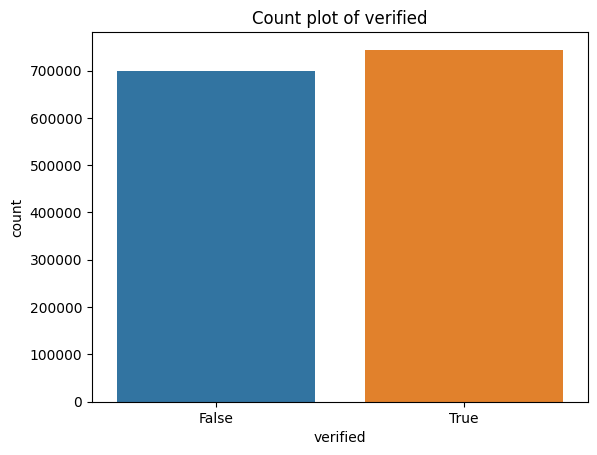

In [ ]:
# plot verified and non-verified
sns.countplot(data = myData, x = 'verified').set(title = "Count plot of verified")


In [ ]:
# filter only the verified tweets
myData.query('verified == "True" ')

,reviewerID,asin,reviewerName,verified,reviewText,overall,reviewTime,summary,unixReviewTime,style,vote,image


In [ ]:
# only keep the verified reviews
myData = myData[myData['verified'] == True]
len(myData)

743956

In [ ]:
myData.to_csv()

### Data Cleaning

The following text cleaning procedures are conducted:

1. Convert all texts to string characters
2. Remove special characters using` ReGeX`
3. Strip off whitespaces
4. Only keep words that have more than 5 chracters and join all reviews.
5. Tokenize the words
6. Remove stop words and convert all words to lower case


In [ ]:
# Create an empty list to store the cleaned reviews
cleaned_review = []

# Tidy up the reviews

for review in myData['reviewText'].apply(str):
  # Remove special characters
  review = re.sub("[^a-zA-Z']"," ",review)
  #Remove leading and trailing whitespaces
  review = review.strip()
  #Restrict the length of the string
  if len(review) > 5:
    cleaned_review.append(review)

# Concatenate all the reviews into a single string
all_review = ' '.join(cleaned_review)

In [ ]:
# Tokenise into words
# myWords = word_tokenize(all_review)

### Frequency Distribution

In [ ]:

# Need a dictionary of stop words
en_stopwords = set(stopwords.words('english'))

# Remove stop words
# Only keep words with more than 3 letters
# Lowercase the words
myWords_noSW_noCase = [word.lower() for word in myWords if (word.lower() not in en_stopwords) and (len(word)>3)]

# Count word frequency with the cleaned set
fDist = FreqDist(myWords_noSW_noCase)

# Take a look
fDist.most_common(30)

[('album', 343422),
 ('great', 274623),
 ('music', 257438),
 ('like', 207143),
 ('songs', 196868),
 ('good', 184428),
 ('love', 170735),
 ('song', 135682),
 ('best', 111888),
 ('sound', 107930),
 ('time', 105552),
 ('really', 96229),
 ('first', 90763),
 ('would', 90720),
 ('well', 89910),
 ('band', 89028),
 ('much', 73441),
 ('albums', 70325),
 ('still', 68136),
 ('rock', 67063),
 ('listen', 65941),
 ('back', 62891),
 ('also', 61779),
 ('better', 61552),
 ('even', 60713),
 ('many', 59230),
 ('years', 57766),
 ('tracks', 57646),
 ('voice', 57619),
 ('collection', 56488)]

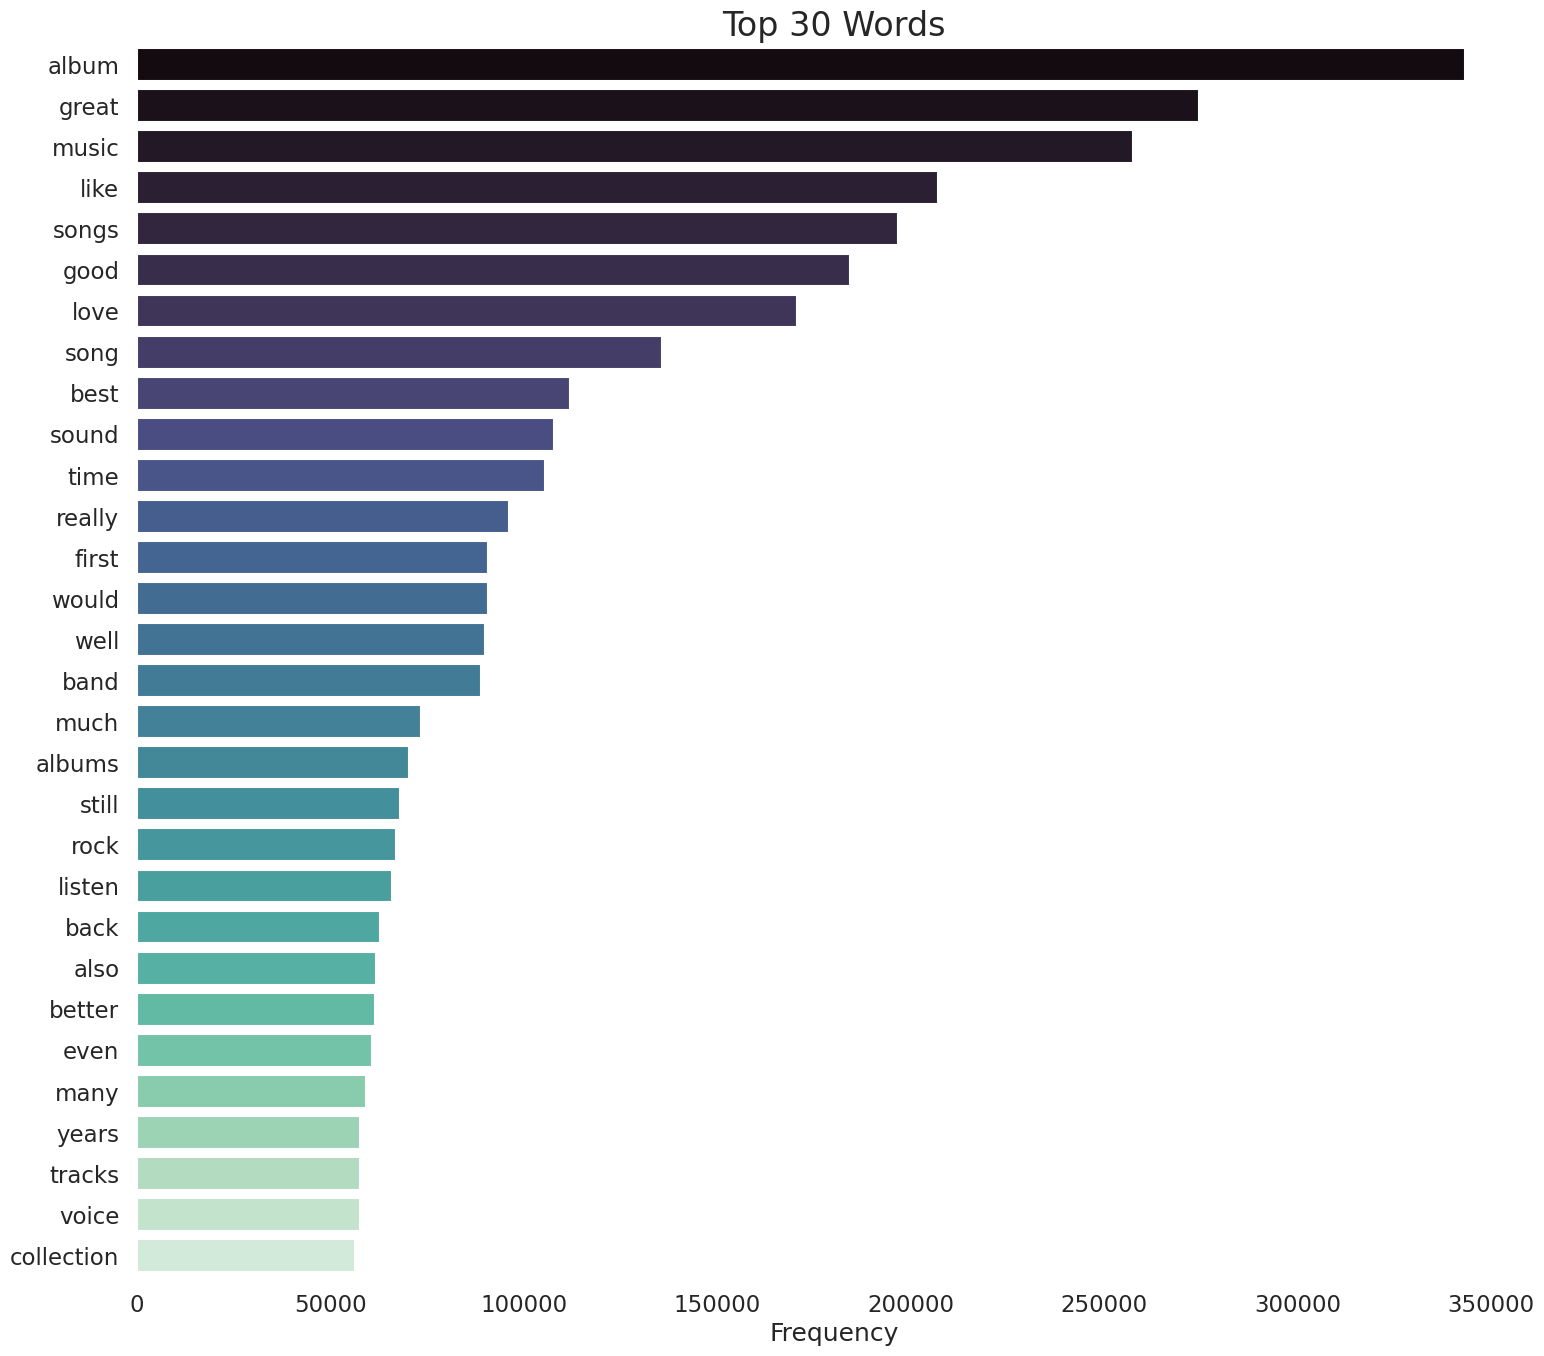

In [ ]:
# Visualise the result

# Convert the result to a dataframe for visualisation
myDF = pd.DataFrame(fDist.most_common(30), columns=['word', 'frequency'])

# Set a more specific style
sns.set_theme(style="white", context="talk")
#sns.set_theme(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18,16))

# x and y will control if the barplot is horizontal or vertical
sns.barplot(x="frequency",
            y="word",
            data=myDF,
            palette="mako"
            )

# Add label to horiztontal axis
ax.set_xlabel("Frequency")

# Remove ylabel
ax.set_ylabel("")

# Add a title
ax.set_title("Top 30 Words", fontsize = 24)

# Remove the border line
sns.despine(left=True, bottom=True)

# Save the figure
plt.savefig("top30.png",
            bbox_inches="tight",
            dpi=200)

# Show nicely in the notebook
plt.show()

### VADER Sentiment Classifier

In [ ]:
myData.shape

(743956, 12)

In [ ]:
# import VADER pre-trained sentiment classifier

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
from nltk.corpus import stopwords


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# Need a dictionary of stop words
en_stopwords = set(stopwords.words('english'))


In [ ]:
# Operate the data cleaning process on dataframe directly

# Make sure the column 'reviewText' is of string type
myData['reviewText'] = myData['reviewText'].apply(str)
# Remove special characters
myData['clean_review'] = myData['reviewText'].str.replace("[^a-zA-Z']"," ",regex=True)
# Remove leading and trailing whitespaces
myData['clean_review'] = myData['clean_review'].str.strip()

In [ ]:
# Define some functions for convenience

def getSentCat(text):
  myScore = sia.polarity_scores(text)['compound']
  if myScore > 0:
    myCat = 'positive'
  elif myScore < 0:
    myCat = 'negative'
  else:
    myCat = 'neutral'
  return(myCat)

In [ ]:
# Generate a new column to store the compound scores

myData['sentiment_cat'] = myData.apply(lambda x: getSentCat(x['clean_review']), axis=1)

In [ ]:
# Get the words for positive sentiment

# Subset the data
myDataPos = myData[myData['sentiment_cat']=='positive']
# Take the reviews
myReviewPos = myDataPos['clean_review']
# Make a single string
all_review_pos = ' '.join(myReviewPos)


In [ ]:
# Break to words
myWordsPos = word_tokenize(all_review_pos)

In [ ]:
# Remove stopwords and cases
myWordsPos_noSW_noCase = [word.lower() for word in myWordsPos if (word.lower() not in en_stopwords) and (len(word)>3)]
# Make a single string again for word cloud
myStringPos = " ".join(myWordsPos_noSW_noCase)

In [ ]:
# Get the words for negative sentiment

# Subset the data
myDataNeg = myData[myData['sentiment_cat']=='negative']
# Take the reviews
myReviewNeg = myDataNeg['clean_review']
# Make a single string
all_review_neg = ' '.join(myReviewNeg)

In [ ]:
# Break to words
myWordsNeg = word_tokenize(all_review_neg)

In [ ]:

# Remove stopwords and cases
myWordsNeg_noSW_noCase = [word.lower() for word in myWordsNeg if (word.lower() not in en_stopwords) and (len(word)>3)]
# Make a single string again for word cloud
myStringNeg = " ".join(myWordsNeg_noSW_noCase)

### Word Cloud

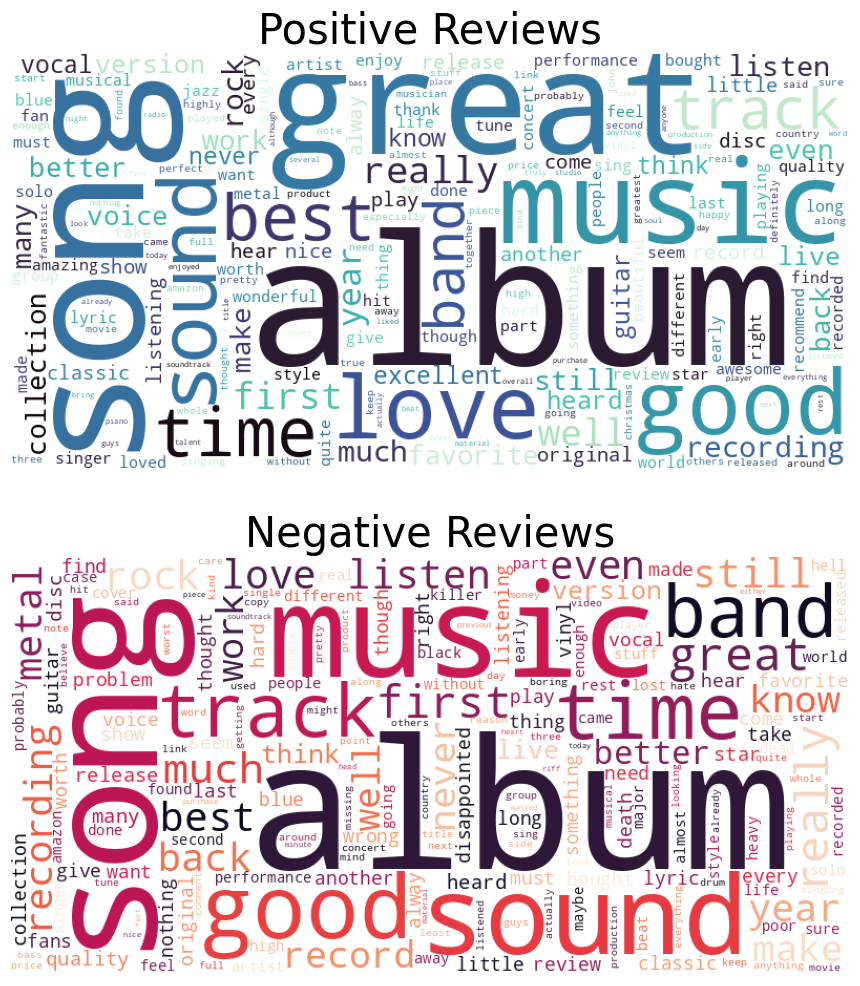

In [ ]:
# Use the package wordcloud
from wordcloud import WordCloud

# Set up the matplotlib figure
f, ax = plt.subplots(2, 1,
                     figsize=(12,12)
                     )

# Generate a word cloud for postive tweets
myCloudPos = WordCloud(random_state=9165,
                       width=800, height=400,
                       # collocations=True will include 2 words/bigrams
                       collocations=False,
                       background_color='white',
                       colormap='mako'
                       ).generate(myStringPos)

ax[0].imshow(myCloudPos)
ax[0].set_title('Positive Reviews',fontsize=30)
ax[0].set_xlabel('')
ax[0].axis("off")

# Generate a word cloud for negtive tweets
myCloudNeg = WordCloud(random_state=9165,
                       width=800, height=400,
                       # collocations=True will include 2 words/bigrams
                       collocations=False,
                       background_color='white',
                       colormap='rocket'
                       ).generate(myStringNeg)

ax[1].imshow(myCloudNeg)
ax[1].set_title('Negative Reviews',fontsize=30)
ax[1].set_xlabel('')
ax[1].axis("off")

# Save the figure
plt.savefig('conditionalWordcloud.png',
            bbox_inches='tight',
            dpi=400)

# Show nicely in the notebook
plt.show()

### Word Frequency

In [ ]:
# Count word frequency with the cleaned set
fDistPos = FreqDist(myWordsPos_noSW_noCase)

# Convert the result to a dataframe for visualisation
myDFPos = pd.DataFrame(fDistPos.most_common(30), columns=['word', 'frequency'])
myDFPos

,word,frequency
0,album,323610
1,great,282330
2,music,245256
3,like,196914
4,songs,186522
5,good,182392
6,love,167927
7,song,129385
8,best,108799
9,sound,101841


In [ ]:
# Count word frequency with the cleaned set
fDistNeg = FreqDist(myWordsNeg_noSW_noCase)

# Convert the result to a dataframe for visualisation
myDFNeg = pd.DataFrame(fDistNeg.most_common(30), columns=['word', 'frequency'])
myDFNeg

,word,frequency
0,album,17038
1,like,10353
2,music,9658
3,songs,8958
4,good,7628
5,song,5634
6,sound,5564
7,great,4764
8,time,4750
9,would,4738


### Bar Chart

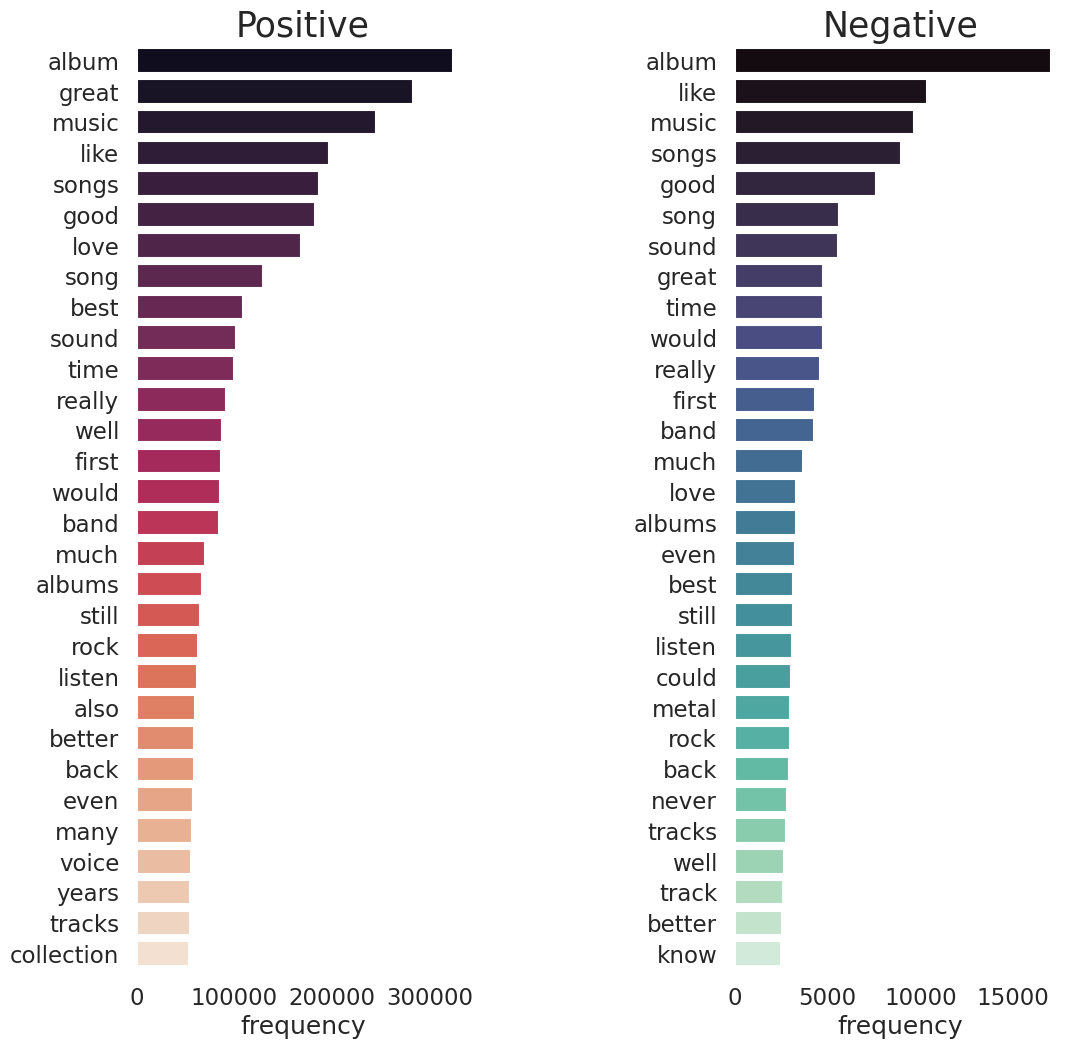

In [ ]:
# Set a more specific style
sns.set_theme(style="white", context="talk")

# Set up the matplotlib figure
f, ax = plt.subplots(1, 2,
                     figsize=(12,12)
                     )

# Barplot for positive tweets
sns.barplot(x="frequency",
            y="word",
            data=myDFPos,
            palette="rocket",
            ax=ax[0]
            )

ax[0].set_title('Positive',fontsize=25)
ax[0].set_ylabel('')

# Barplot for negative tweets
sns.barplot(x="frequency",
            y="word",
            data=myDFNeg,
            palette="mako",
            ax=ax[1]
            )

ax[1].set_title('Negative',fontsize=25)
ax[1].set_ylabel('')

# Leave some space between subplots
# Try commenting it out
plt.subplots_adjust(wspace=0.8)

# Remove the border line
sns.despine(left=True, bottom=True)

# Save the figure
plt.savefig('conditionalWordFreq.png',
            bbox_inches='tight',
            dpi=400)

# Show nicely in the notebook
plt.show()